In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [103]:
xtrain.shape

(60000, 28, 28)

In [104]:
len(xtrain)

60000

In [105]:
xtest.shape

(10000, 28, 28)

In [106]:
len(xtest)

10000

**Flatten**

In [107]:
xtrain_flatten = xtrain.reshape(len(xtrain), 28*28)
xtest_flatten=xtest.reshape(len(xtest), 28*28)

In [108]:
len(xtrain_flatten)

60000

In [109]:
xtrain_flatten.shape

(60000, 784)

In [110]:
len(xtest_flatten)

10000

In [111]:
# Normalization

In [112]:
xtrain_flatten=xtrain_flatten/255
xtest_flatten=xtest_flatten/255

In [113]:
xtrain_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
#encoding labels

In [115]:
y_train=to_categorical(ytrain)
y_test=to_categorical(ytest)

In [127]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [126]:
ytest[0]

7

**Model Building**

In [116]:
# model=keras.Sequential([
#     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# model.fit(xtrain_flatten,y_train,epochs=5)

In [140]:
def baseline_model():#creating a base model
  model = Sequential()
  model.add(Dense(784,input_dim=784,kernel_initializer='normal',activation='relu')) #784
  model.add(Dense(10,kernel_initializer='normal',activation='softmax'))


  #compile model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model.save('baseline.h5')
  return model

In [141]:
model=baseline_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
model.fit(xtrain_flatten,y_train,validation_data = (xtest_flatten,y_test),epochs=10,batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8655 - loss: 0.4766 - val_accuracy: 0.9601 - val_loss: 0.1368
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9657 - loss: 0.1227 - val_accuracy: 0.9709 - val_loss: 0.0939
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9788 - loss: 0.0720 - val_accuracy: 0.9759 - val_loss: 0.0789
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9867 - loss: 0.0489 - val_accuracy: 0.9773 - val_loss: 0.0720
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9899 - loss: 0.0344 - val_accuracy: 0.9793 - val_loss: 0.0650
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9936 - loss: 0.0246 - val_accuracy: 0.9802 - val_loss: 0.0621
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9959 - loss: 0.0178 - val_accuracy: 0.9801 - val_loss: 0.0676
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9971 - loss: 0.0137 - val_ac

**Model Evaluation**

In [143]:
model.evaluate(xtest_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0748


[0.06477124243974686, 0.9793999791145325]

**Prediction**

In [144]:
y_pred = model.predict(xtest_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [145]:
y_pred[0]

array([1.0284766e-09, 8.3195957e-11, 5.9351987e-07, 2.4834946e-05,
       2.4057781e-12, 4.8861533e-09, 2.1580798e-13, 9.9997264e-01,
       6.5451992e-08, 1.8516012e-06], dtype=float32)

In [146]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**Confusion Metrics**

In [147]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [148]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [149]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_pred_labels)

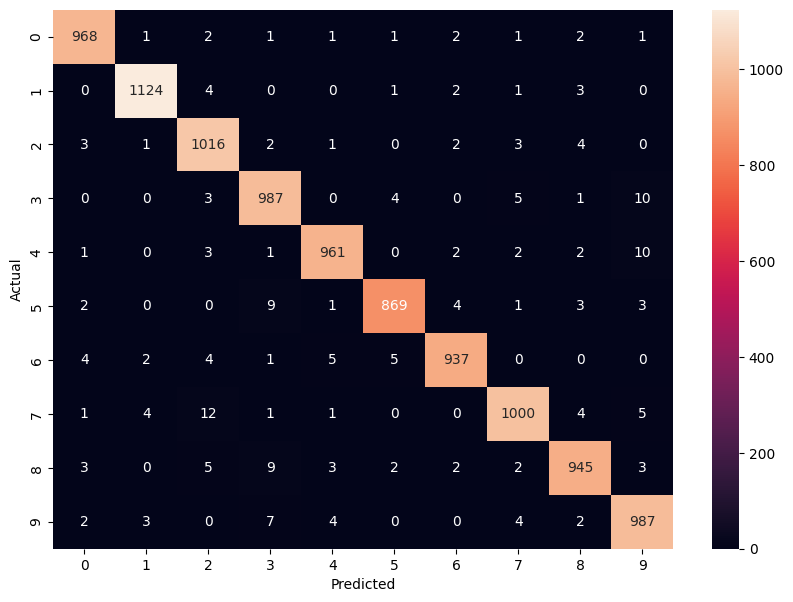

In [150]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [151]:
 # it is clear that certain values have predicted incorrectly for example 7 was predicted incorrectly for about 10 times with 2, the higher the diagonal values compared to the off_diagonal values, the better the performance of the model